In [ ]:
# accessing project folder in google drive. Once this cell is run, we will be inside project folder.
import os
os.chdir('/content/drive/MyDrive/programs/Datasets/toxic comment classification')

In [ ]:
from tqdm import tqdm

In [ ]:
# load all necessary libraries
import re
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm_notebook as tqdm
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# load data 
toxic_data = pd.read_csv('../data/train.csv')
print("Shape of data : ", toxic_data.shape)
toxic_data.head()

Shape of data :  (159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
# removinbg duplicate data if there are.
toxic_data.drop_duplicates(subset='comment_text', inplace=True)
print('NOw data size is : ',toxic_data.shape)

NOw data size is :  (159571, 8)


'\nfor index, row in toxic_data.iterrows():\n  while index < 5:\n    print("Toxic comment: ", row.toxic_data[\'comment_text\'])\n    for t in toxic_type:\n      if row.toxic_data[data]\n    #print(\'Toxic type: \', row.toxic_data[\'toxic\'])\n'

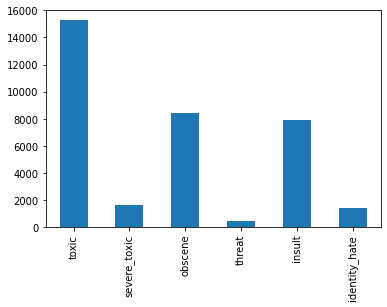

In [ ]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
cat_df = toxic_data[categories].sum(axis=0).plot.bar()
"""
for index, row in toxic_data.iterrows():
  while index < 5:
    print("Toxic comment: ", row.toxic_data['comment_text'])
    for t in toxic_type:
      if row.toxic_data[data]
    #print('Toxic type: ', row.toxic_data['toxic'])
"""

In [ ]:
stop_words = set(stopwords.words('english'))
# function to preprocess and remove stopwords
def preprocess(text):
  no_stops = []
  sent = text.lower()
  sent = re.sub(r"[^a-zA-Z]"," ",sent)    # removes all characters except alphabets
  sent = re.sub(r'\s+', ' ', sent)       # removes extra white spaces
  #sent = str(text)
  for w in sent.split():
    if not w in stop_words:
      no_stops.append(w)
  return (" ".join(no_stops))

In [ ]:
toxic_data['cleaned_comments'] = toxic_data['comment_text'].apply(lambda x: preprocess(str(x)))

In [ ]:
# creating wordcloud for every toxic categories
def wordCloud(category):
  toxic_comments = toxic_data[toxic_data[category]==1]['cleaned_comments'].values
  wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color = 'white',
                      max_words=1000).generate(str(toxic_comments))
  fig = plt.figure(figsize = (10, 10),
                 facecolor = 'k',
                 edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.title(category+' '+'comments')
  plt.savefig('../plots/wordCloud/'+category+'.png')
  plt.show()

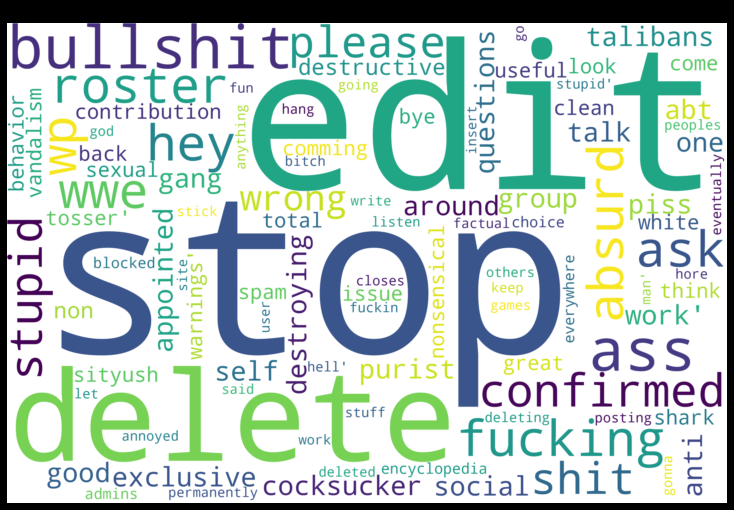

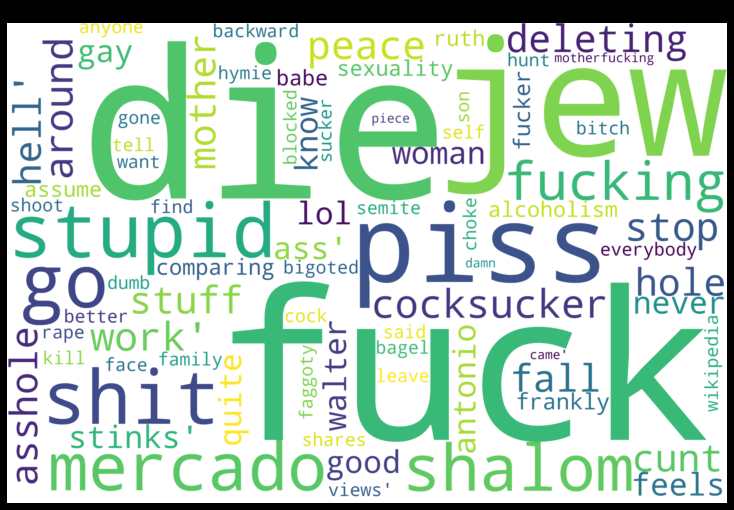

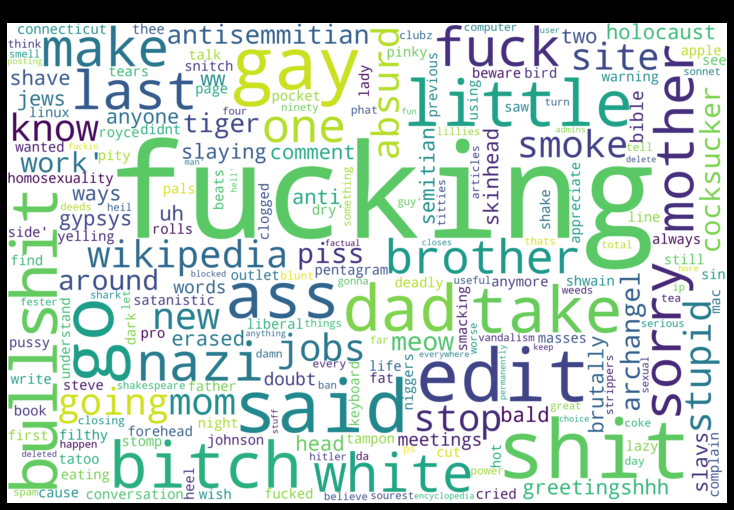

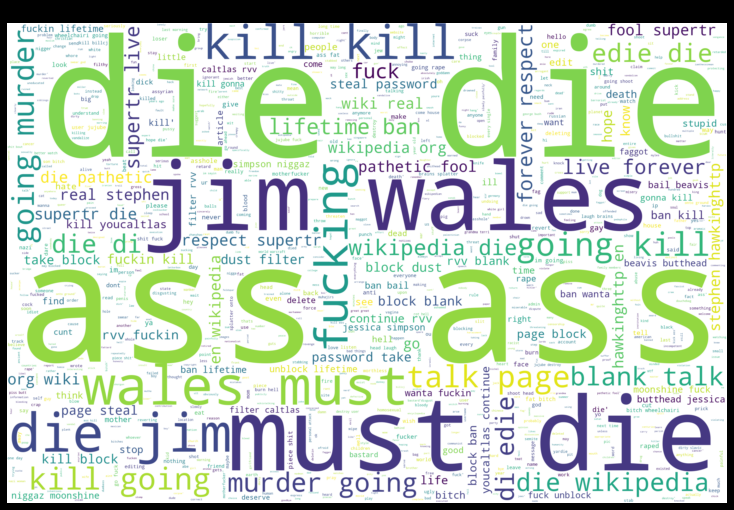

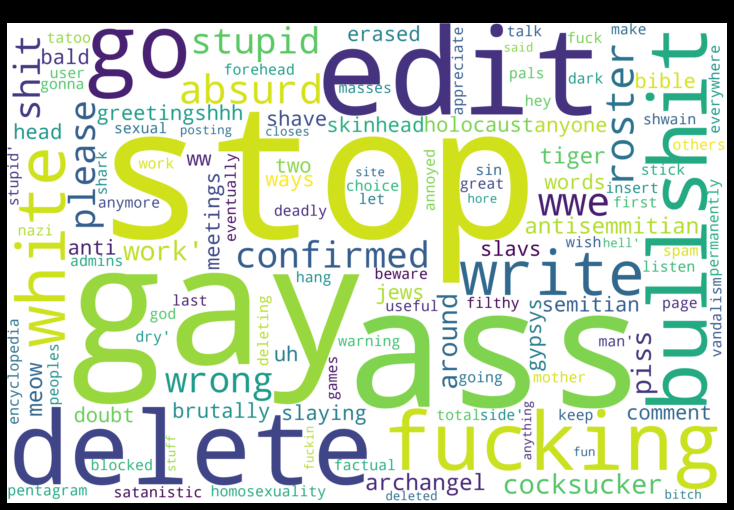

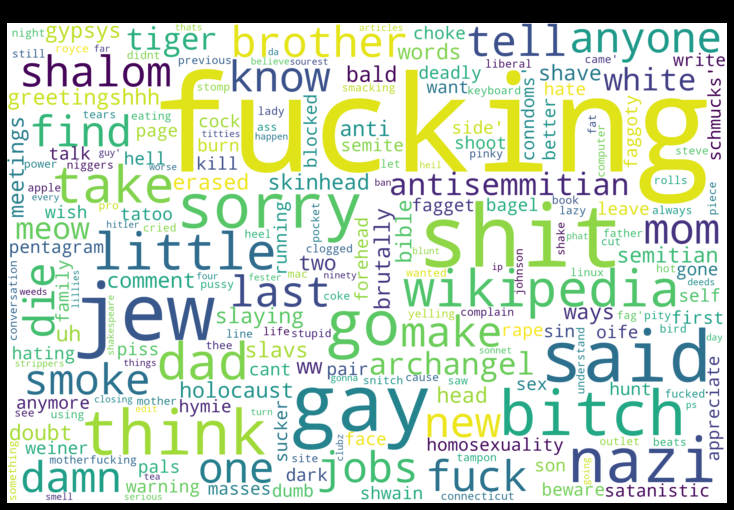

In [ ]:
for category in categories:
  wordcloud = wordCloud(category)
  print('\n')

In [ ]:
X = toxic_data['cleaned_comments']  # vector of independent feature (cleaned_comments columns)
Y = toxic_data[categories]           # vectors of target class/categories 
# splitting data into traina and test set 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# creating vectorizer
tfidf = TfidfVectorizer(max_features=5000,stop_words='english', max_df=0.7)
tfidf = tfidf.fit(x_train)

# saiving the vectorizer as pickle file
with open("../saved_models/tfidfVectorizer.pkl", "wb") as file:
  pickle.dump(tfidf,file)

X_train = tfidf.transform(x_train).toarray()
X_test = tfidf.transform(x_test).toarray()

print('Training feature shape : ', X_train.shape)
print('Test ffeature shape : ', X_test.shape)

Training feature shape :  (127656, 5000)
Test ffeature shape :  (31915, 5000)


### Model Training and Evaluating  
<small>This is an multilabel classification problem. In such multilabel classification, a same text/independent features can belong to zero or more categores.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
svc_clf = OneVsRestClassifier(LinearSVC())
linearSVC = MultiOutputClassifier(LinearSVC())
NB_clf = OneVsRestClassifier(MultinomialNB())
log_reg = OneVsRestClassifier(LogisticRegression())

def execute(model, x_train=X_train, x_test=X_test, option=True):
  accuracies=[]
  if option:
    for category in tqdm(categories):
      model.fit(x_train,y_train[category])
      prediction = model.predict(x_test)

      if len(x_test) == 1:
        if option:
          print('Prediction for {} is {}'.format(category,prediction))
      else:
        print('Test accuracy for {} is {}'.format(category,metrics.accuracy_score(y_test[category],prediction)))
        accuracies.append(metrics.accuracy_score(y_test[category], prediction))
        print('precision_recall_fscore_support_weighted', precision_recall_fscore_support(y_test[category], prediction, average='weighted'))
      modelname = 'model_'+category+'.pkl'
      path = '../saved_models/'+modelname 
      with open(path, 'wb') as file:
        pickle.dump(model,file)
  print('mean: ', sum(accuracies)/len(accuracies)) if option and len(accuracies)!=0 else None
  return accuracies

In [ ]:
print('Result for MultinomialNB: \n')
accNB = execute(NB_clf)

print('\n-------------------------------------------------------------------------\n')
print('Result for Logistic Regression:\n')
accLogReg = execute(log_reg)

print('\n-------------------------------------------------------------------------\n')
print('Result for Linear Support Vector Machine:\n')
accSVM = execute(svc_clf)

Result for MultinomialNB: 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


Test accuracy for toxic is 0.9499295002349992
precision_recall_fscore_support_weighted (0.9485224637929146, 0.9499295002349992, 0.9436554127288804, None)
Test accuracy for severe_toxic is 0.990474698417672
precision_recall_fscore_support_weighted (0.987587020572246, 0.990474698417672, 0.9877607502513226, None)
Test accuracy for obscene is 0.9721760927463575
precision_recall_fscore_support_weighted (0.970626999622135, 0.9721760927463575, 0.968842102767667, None)
Test accuracy for threat is 0.9976813410621964
precision_recall_fscore_support_weighted (0.9953680583036627, 0.9976813410621964, 0.9965233571981116, None)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test accuracy for insult is 0.9665674447751841
precision_recall_fscore_support_weighted (0.9628419035752266, 0.9665674447751841, 0.9619564715733937, None)
Test accuracy for identity_hate is 0.9911013629954567
precision_recall_fscore_support_weighted (0.9885902555996675, 0.9911013629954567, 0.9873938340191886, None)

mean:  0.977988406705311

-------------------------------------------------------------------------

Result for Logistic Regression:



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


Test accuracy for toxic is 0.956509478301739
precision_recall_fscore_support_weighted (0.9546656284955023, 0.956509478301739, 0.9527668042374471, None)
Test accuracy for severe_toxic is 0.9905060316465611
precision_recall_fscore_support_weighted (0.988188495634864, 0.9905060316465611, 0.9887954159354813, None)
Test accuracy for obscene is 0.977659407801974
precision_recall_fscore_support_weighted (0.9766507118873389, 0.977659407801974, 0.9757803631501386, None)
Test accuracy for threat is 0.9977753407488642
precision_recall_fscore_support_weighted (0.9970441692158186, 0.9977753407488642, 0.9969964959348283, None)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Test accuracy for insult is 0.9705467648441172
precision_recall_fscore_support_weighted (0.9678715481251875, 0.9705467648441172, 0.967302275787728, None)
Test accuracy for identity_hate is 0.9918533604887984
precision_recall_fscore_support_weighted (0.9902680443048409, 0.9918533604887984, 0.9892137256480669, None)

mean:  0.9808083973053424

-------------------------------------------------------------------------

Result for Linear Support Vector Machine:



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


Test accuracy for toxic is 0.9586088046373179
precision_recall_fscore_support_weighted (0.9565015224612033, 0.9586088046373179, 0.9560400852963252, None)
Test accuracy for severe_toxic is 0.9907253642487859
precision_recall_fscore_support_weighted (0.9883311830333811, 0.9907253642487859, 0.9887314339200989, None)
Test accuracy for obscene is 0.9792887357042144
precision_recall_fscore_support_weighted (0.9782478139975102, 0.9792887357042144, 0.9780303269092521, None)
Test accuracy for threat is 0.9977753407488642
precision_recall_fscore_support_weighted (0.9971235491688313, 0.9977753407488642, 0.9972585423529128, None)
Test accuracy for insult is 0.9707347642174526
precision_recall_fscore_support_weighted (0.9680780669896235, 0.9707347642174526, 0.9683298573657393, None)
Test accuracy for identity_hate is 0.991947360175466
precision_recall_fscore_support_weighted (0.9900965164689887, 0.991947360175466, 0.9898689269432687, None)

mean:  0.9815133949553502


In [ ]:
#For MultOutputClasifier strategy
def execute2(model, x_train=X_train, x_test=X_test,  verbose=True):
  accuracies=[]
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  # converting both y_test and y_pred to  array   
  y_test_array = np.array(y_test.values.tolist())
  y_pred_array = np.array(y_pred.tolist())
  conf_mat = metrics.multilabel_confusion_matrix(y_test_array, y_pred_array)
  print('Test accuracy is {}'.format(metrics.accuracy_score(y_test_array, y_pred_array)))
  print(conf_mat)
  return accuracies

In [ ]:
#For MultOutputClasifier strategy
# classification report 
from sklearn.metrics import classification_report
def execute3(model, x_train=X_train, x_test=X_test,  verbose=True):
  accuracies=[]
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  # converting both y_test and y_pred to  array   
  y_test_array = np.array(y_test.values.tolist())
  y_pred_array = np.array(y_pred.tolist())
  clf_report = classification_report(y_test_array, y_pred_array)
  print('Test accuracy is {}'.format(metrics.accuracy_score(y_test_array, y_pred_array)))
  print(clf_report)
  return accuracies

In [ ]:
## Confusion Matrix

print('Result for MultinomialNB: \n')
accNB_CM = execute2(NB_clf)

print('\n-------------------------------------------------------------------------\n')
print('Result for Linear Support Vector Machine:\n')
accSVM_CM = execute2(svc_clf)

Result for MultinomialNB: 

Test accuracy is 0.9127369575434748
[[[28715   144]
  [ 1454  1602]]

 [[31559    35]
  [  269    52]]

 [[30100   100]
  [  788   927]]

 [[31841     0]
  [   74     0]]

 [[30128   173]
  [  894   720]]

 [[31613     8]
  [  276    18]]]

-------------------------------------------------------------------------

Result for Linear Support Vector Machine:

Test accuracy is 0.9195989346702178
[[[28566   293]
  [ 1028  2028]]

 [[31543    51]
  [  245    76]]

 [[30064   136]
  [  525  1190]]

 [[31829    12]
  [   59    15]]

 [[30071   230]
  [  704   910]]

 [[31593    28]
  [  229    65]]]


In [ ]:
print('Result for MultinomialNB: \n')
accNB_cr = execute3(NB_clf)

print('\n-------------------------------------------------------------------------\n')
print('Result for Linear Support Vector Machine:\n')
accSVM_cr = execute3(svc_clf)

Result for MultinomialNB: 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test accuracy is 0.9127369575434748
              precision    recall  f1-score   support

           0       0.92      0.52      0.67      3056
           1       0.60      0.16      0.25       321
           2       0.90      0.54      0.68      1715
           3       0.00      0.00      0.00        74
           4       0.81      0.45      0.57      1614
           5       0.69      0.06      0.11       294

   micro avg       0.88      0.47      0.61      7074
   macro avg       0.65      0.29      0.38      7074
weighted avg       0.86      0.47      0.60      7074
 samples avg       0.05      0.04      0.04      7074


-------------------------------------------------------------------------

Result for Linear Support Vector Machine:

Test accuracy is 0.9195989346702178
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      3056
           1       0.60      0.24      0.34       321
           2       0.90      0.69      0.78      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Test 
<small>Given a text string(a comment), determine labels/categories of toxicity for it.

In [ ]:
test_string = """ you little piece of shit. do you really want me to smack on your fucking face goddamn moron"""
#test_string = """We should not be using abusive words like slut, mmoron, idiots, fuck etc """
test_str = preprocess(test_string)
tfidf_test_string = tfidf.transform(list([test_str])).toarray()

acc = execute(NB_clf, x_test = tfidf_test_string)
print('\n')
print(test_string)
acc = execute(svc_clf, x_test=tfidf_test_string)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


Prediction for toxic is [1]
Prediction for severe_toxic is [0]
Prediction for obscene is [1]
Prediction for threat is [0]
Prediction for insult is [1]
Prediction for identity_hate is [0]



 you little piece of shit. do you really want me to smack on your fucking face goddamn moron


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


Prediction for toxic is [1]
Prediction for severe_toxic is [0]
Prediction for obscene is [1]
Prediction for threat is [0]
Prediction for insult is [1]
Prediction for identity_hate is [0]



In [ ]:
# Tried hyperparameter tuning but result was almost same as without tuning. so this portion was uncessary
# for our model.
"""
from sklearn.model_selection import RandomizedSearchCV
# defining parameter range
param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001]}
svc_tune = RandomizedSearchCV(LinearSVC(),param_grid,cv=5)
print('Result after hyperparameter tuning:\n')
acc = execute(model = OneVsRestClassifier(svc_tune))
"""

"\nfrom sklearn.model_selection import RandomizedSearchCV\n# defining parameter range\nparam_grid = {'C':[0.1,1,10,100,1000],\n              'gamma':[1,0.1,0.01,0.001,0.0001]}\nsvc_tune = RandomizedSearchCV(LinearSVC(),param_grid,cv=5)\nprint('Result after hyperparameter tuning:\n')\nacc = execute(model = OneVsRestClassifier(svc_tune))\n"

##### Model comparasion

In [ ]:
compare_df = pd.DataFrame()
compare_df['Category'] = categories
compare_df['Acc NB'] = accNB
compare_df['Acc LogReg'] = accLogReg
compare_df['Acc SVM'] = accSVM
compare_df['SVM advantage to NB'] = compare_df['Acc SVM'] - compare_df['Acc NB']
compare_df['SVM advantage to LogReg'] = compare_df['Acc SVM'] - compare_df['Acc LogReg']
compare_df.index = compare_df.Category
compare_df.drop('Category', axis=1, inplace=True)
compare_df.to_csv('../model comparison/model_comparison.csv')
compare_df

,Acc NB,Acc LogReg,Acc SVM,SVM advantage to NB,SVM advantage to LogReg
Category,,,,,
toxic,0.949930,0.956509,0.958609,0.008679,0.002099
severe_toxic,0.990475,0.990506,0.990725,0.000251,0.000219
obscene,0.972176,0.977659,0.979289,0.007113,0.001629
threat,0.997681,0.997775,0.997775,0.000094,0.000000
insult,0.966567,0.970547,0.970735,0.004167,0.000188
identity_hate,0.991101,0.991853,0.991947,0.000846,0.000094


##### Some rough sketches done before building web app

In [ ]:
## loading all saved models

with open('saved_models/tfidfVectorizer.pkl','rb') as file:
  tfidf = pickle.load(file)

with open('saved_models/model_toxic.pkl','rb') as file:
  model_toxic = pickle.load(file)

with open('saved_models/model_severe_toxic.pkl','rb') as file:
  model_severe_toxic = pickle.load(file)

with open('saved_models/model_obscene.pkl','rb') as file:
  model_obscene = pickle.load(file)

with open('saved_models/model_insult.pkl','rb') as file:
  model_insult = pickle.load(file)

with open('saved_models/model_threat.pkl','rb') as file:
  model_threat = pickle.load(file)

with open('saved_models/model_identity_hate.pkl','rb') as file:
  model_identity_hate = pickle.load(file)


#model_list = ['model_toxic','model_severe_toxic', 'model_obscene', 'model_insult', 'model_threat', 'model_identity_hate']

In [ ]:
model_list = [model_toxic, model_severe_toxic, model_obscene, model_insult, model_threat, model_identity_hate]


In [ ]:
def Execute(x_test=X_test, option=True):
  category_list = ['toxic', 'severe_toxic', 'obscene', 'insult', 'threat', 'identity_hate']
  accuracies=[]
  if option:
    for model, category in tqdm(zip(model_list,category_list)):
      prediction = model.predict(x_test)
      if len(x_test) == 1:
        if option:
          if prediction[0] == 1:
            print(category)
      else:
        pass


In [ ]:
#test_string = [""""I don't give the fuck those goddamn morons says."""]
test_string = "I don't give the fuck those goddamn morons says."

test_str = preprocess(test_string)
#tf_idf = TfidfVectorizer(stop_words='english',sublinear_tf=True,analyzer='word')
tfidf_test_string = tfidf.transform(list([test_str])).toarray()

acc = Execute(x_test = tfidf_test_string)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


toxic
obscene
insult



In [ ]:
list([test_str])

['give fuck goddamn morons says']

In [ ]:
test_string = [""""I don't give the fuck those goddamn morons says."""]

test_str = preprocess(test_string[0])
#tf_idf = TfidfVectorizer(stop_words='english',sublinear_tf=True,analyzer='word')
tfidf_test_string = tfidf.transform(list(test_string)).toarray()

acc = Execute(x_test = tfidf_test_string)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


toxic
obscene
insult

